# 1.0  Linear Programming

To solve a LP problem, your program should include the following steps:

*   Import OR Tools,
* Declare the LP solver,
*Define the variables,
*Define the constraints,
*Define the objective,
*Call the LP solver; and
*Display the solution

In [2]:
#Download OR Tools
!pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 30.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.24.3 which is incompatible.


## Solution 1 : Using CP-SAT Solver

In [15]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import ortools

import ortools.sat.python.cp_model as cp_model


# Create the CP-SAT model
model = cp_model.CpModel()

# Create the decision variables
x = model.NewBoolVar('x')
y = model.NewBoolVar('y')

# Add the constraints
model.Add(x + 2*y <= 14)
model.Add(3*x - y >= 0)
model.Add(x - y <= 2)
model.Add(x >= 0) #non-negative
model.Add(y >= 0) #non-negative

# Set the objective function
# Objective function: 3x + 4y.
model.Maximize(3*x + 4*y)

# Solve the model
status = solver.Solve(model)

# Print the solution
if status == cp_model.OPTIMAL:
    print('The optimal solution is:')
    print('x = {}'.format(solver.Value(x)))
    print('y = {}'.format(solver.Value(y)))
    print('Objective value = {}'.format(solver.ObjectiveValue()))

else:
    print('No solution found.')

The optimal solution is:
x = 1
y = 1
Objective value = 7.0


### Visualising Feasible Area

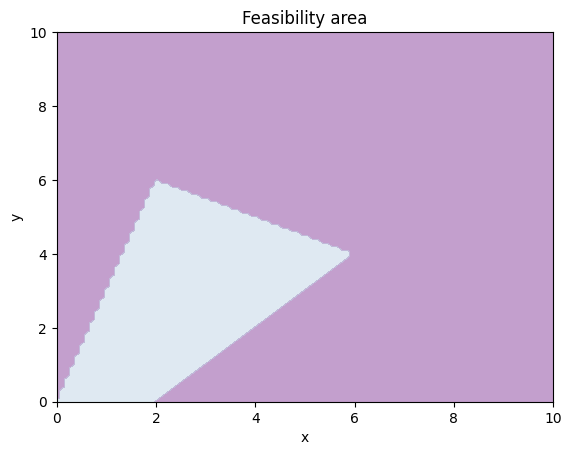

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraints of the feasibility area
constraints = [
    'x + 2*y <= 14',
    '3*x - y >= 0',
    'x - y <= 2',
    'x >= 0',
    'y >= 0'
]

# Create a meshgrid of points in the region of interest
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the constraints at each point in the meshgrid
feasible = np.ones((len(X), len(Y)), dtype=bool)
for constraint in constraints:
    feasible = np.logical_and(feasible, eval(constraint, {'x': X, 'y': Y}))

# Plot the points in the meshgrid that satisfy all of the constraints
plt.contourf(X, Y, feasible, cmap='BuPu_r', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasibility area')
plt.show()

## Solution 2 : Using MPSolver wrapper

In [14]:
from ortools.linear_solver import pywraplp


def LPModel():
    # Instantiate a Glop solver, naming it LinearExample.
    solver = pywraplp.Solver.CreateSolver("GLOP")
    if not solver:
        return

    # Create the two variables and let them take on any non-negative value.
    x = solver.NumVar(0, solver.infinity(), "x")
    y = solver.NumVar(0, solver.infinity(), "y")

    print("Number of variables =", solver.NumVariables())

    # Constraint 0: x + 2y <= 14.
    solver.Add(x + 2 * y <= 14.0)

    # Constraint 1: 3x - y >= 0.
    solver.Add(3 * x - y >= 0.0)

    # Constraint 2: x - y <= 2.
    solver.Add(x - y <= 2.0)

    print("Number of constraints =", solver.NumConstraints())

    # Objective function: 3x + 4y.
    solver.Maximize(3 * x + 4 * y)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solution:")
        print("Objective value =", solver.Objective().Value())
        print("x =", x.solution_value())
        print("y =", y.solution_value())
    else:
        print("The problem does not have an optimal solution.")

    print("\nAdvanced usage:")
    print("Problem solved in %f milliseconds" % solver.wall_time())
    print("Problem solved in %d iterations" % solver.iterations())


LPModel()


Number of variables = 2
Number of constraints = 3
Solution:
Objective value = 33.99999999999999
x = 5.999999999999998
y = 3.9999999999999996

Advanced usage:
Problem solved in 3.000000 milliseconds
Problem solved in 2 iterations


### Visualising Feasible Area

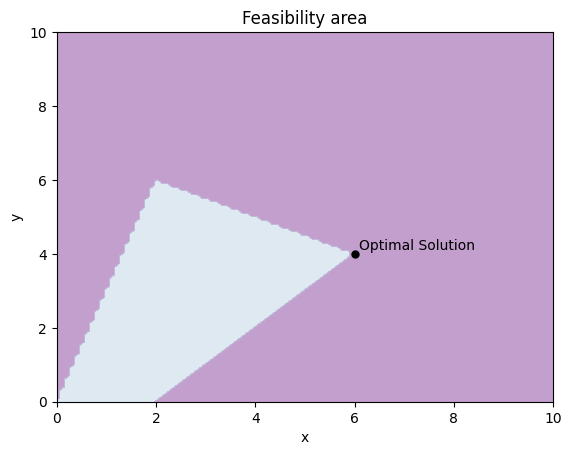

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraints of the feasibility area
constraints = [
    'x + 2*y <= 14',
    '3*x - y >= 0',
    'x - y <= 2',
    'x >= 0',
    'y >= 0'
]

# Create a meshgrid of points in the region of interest
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the constraints at each point in the meshgrid
feasible = np.ones((len(X), len(Y)), dtype=bool)
for constraint in constraints:
    feasible = np.logical_and(feasible, eval(constraint, {'x': X, 'y': Y}))

# Plot the points in the meshgrid that satisfy all of the constraints
plt.contourf(X, Y, feasible, cmap='BuPu_r', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasibility area')

#Plot the optimal solution
point = np.array([5.999999999999998, 3.9999999999999996])

# Plot the point using the matplotlib.pyplot.plot() function
plt.plot(point[0], point[1], 'ko', markersize=5)

# Add a text annotation to the graph
plt.annotate('Optimal Solution', point, xytext=(point[0] + 0.1, point[1] + 0.1))

plt.show()

## (Advanced) Solution 3 : Using GLPK Solver from PyOMO Librarby
 GLPK uses the simplex method for solving linear problems and branch-and-bound for dealing with integer optimization problems

In [33]:
!pip install pyomo --quiet

from IPython.display import clear_output

# Installing cbc solver
import matplotlib.pyplot as plt
import numpy as np

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

clear_output()

In [34]:
infinity = float('inf')

model = AbstractModel()

# Foods
model.F = Set()
# Nutrients
model.N = Set()

Next, we will define parems, objective function and constraints respectively

In [28]:
#Define Model Parem
# Cost of each food
model.c    = Param(model.F, within=PositiveReals)
# Amount of nutrient in each food
model.a    = Param(model.F, model.N, within=NonNegativeReals)
# Lower and upper bound on each nutrient
model.Nmin = Param(model.N, within=NonNegativeReals, default=0.0)
model.Nmax = Param(model.N, within=NonNegativeReals, default=infinity)
# Volume per serving of food
model.V    = Param(model.F, within=PositiveReals)
# Maximum volume of food consumed
model.Vmax = Param(within=PositiveReals)

In [29]:
# Number of servings consumed of each food
model.x = Var(model.F, within=NonNegativeIntegers)

In [30]:
#Writing Objective Function

#Objective: Minimize the cost of food that is consumed
def cost_rule(model):
    return sum(model.c[i]*model.x[i] for i in model.F)
model.cost = Objective(rule=cost_rule)

In [31]:
#Define rules for constraints

def nutrient_rule(model, j):
    value = sum(model.a[i,j]*model.x[i] for i in model.F)
    return inequality(model.Nmin[j], value, model.Nmax[j])
model.nutrient_limit = Constraint(model.N, rule=nutrient_rule)

# Limit the volume of food consumed
def volume_rule(model):
    return sum(model.V[i]*model.x[i] for i in model.F) <= model.Vmax
model.volume = Constraint(rule=volume_rule)

Lastly, we will download data for the problem

In [35]:
# Donwloading file locally
!pip install wget
import wget
import os

print('Beginning file download with wget module')

if os.path.exists('LP_diet.py'):
    os.remove('LP_diet.py')
url = 'https://raw.githubusercontent.com/MerkulovDaniil/sber219/main/notebooks/LP_diet.py'
wget.download(url, 'LP_diet.py')

if os.path.exists('LP_diet.dat'):
    os.remove('LP_diet.dat')
url = 'https://raw.githubusercontent.com/MerkulovDaniil/sber219/main/notebooks/LP_diet.dat'
wget.download(url, 'LP_diet.dat')

clear_output()

In [37]:
#Putting these declarations all together gives the following model:

!cat LP_diet.py

from pyomo.environ import *
infinity = float('inf')

model = AbstractModel()

# Foods
model.F = Set()
# Nutrients
model.N = Set()

# Cost of each food
model.c    = Param(model.F, within=PositiveReals)
# Amount of nutrient in each food
model.a    = Param(model.F, model.N, within=NonNegativeReals)
# Lower and upper bound on each nutrient
model.Nmin = Param(model.N, within=NonNegativeReals, default=0.0)
model.Nmax = Param(model.N, within=NonNegativeReals, default=infinity)
# Volume per serving of food
model.V    = Param(model.F, within=PositiveReals)
# Maximum volume of food consumed
model.Vmax = Param(within=PositiveReals)

# Number of servings consumed of each food
model.x = Var(model.F, within=NonNegativeIntegers)

# Minimize the cost of food that is consumed
def cost_rule(model):
    return sum(model.c[i]*model.x[i] for i in model.F)
model.cost = Objective(rule=cost_rule)

# Limit nutrient consumption for each nutrient
def nutrient_rule(model, j):
    value = sum(model.a[i,j]*model.x[

In [38]:
#Doing the same for data
!cat LP_diet.dat

param:  F:                          c     V  :=
  "Cheeseburger"                 1.84   4.0  
  "Ham Sandwich"                 2.19   7.5  
  "Hamburger"                    1.84   3.5  
  "Fish Sandwich"                1.44   5.0  
  "Chicken Sandwich"             2.29   7.3  
  "Fries"                         .77   2.6  
  "Sausage Biscuit"              1.29   4.1  
  "Lowfat Milk"                   .60   8.0 
  "Orange Juice"                  .72  12.0 ;

param Vmax := 75.0;

param:  N:       Nmin   Nmax :=
        Cal      2000      .
        Carbo     350    375
        Protein    55      .
        VitA      100      .
        VitC      100      .
        Calc      100      .
        Iron      100      . ;

param a:
                               Cal  Carbo Protein   VitA   VitC  Calc  Iron :=
  "Cheeseburger"               510     34     28     15      6    30    20
  "Ham Sandwich"               370     35     24     15     10    20    20
  "Hamburger"                  500     42

To customise this data, you can do the following steps

In [43]:
#Open the file
import io
with io.open('LP_diet.dat', 'r') as f:
    file_contents = f.read()

#Now please input the updated version as file_contents
#file_contents =

#Save the file
with io.open('LP_diet.dat', 'w') as f:
    f.write(file_contents)

Now we will solve this problem using GLPK solver

In [39]:
!pyomo solve --solver=cbc LP_diet.py LP_diet.dat

[    0.00] Setting up Pyomo environment
[    0.00] Applying Pyomo preprocessing actions
[    0.00] Creating model
[    0.04] Applying solver
[    0.15] Processing results
    Number of solutions: 1
    Solution Information
      Gap: 0.0
      Status: optimal
      Function Value: 15.05
    Solver results file: results.yml
[    0.15] Applying Pyomo postprocessing actions
[    0.15] Pyomo Finished


In [40]:
!cat results.yml

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 15.05
  Upper bound: 15.05
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 9
  Number of binary variables: 0
  Number of integer variables: 9
  Number of nonzeros: 9
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.04
  Wallclock time: 0.04
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
  